In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines
import pickle as pk

In [65]:
def create_list_to_plot(acc_cost_pairs, label,marker, color ,marker_label):
    list_to_plot = []
    for acc_cost_pair in acc_cost_pairs:
        acc = acc_cost_pair[0]
        cost = acc_cost_pair[1]
        ece = acc_cost_pair[2]
        inef =  acc_cost_pair[3]
        alpha = 100-acc_cost_pair[4]
        dict_point = {'label':label, 'cost': cost, 'gated_acc':acc, 'gated_ece':ece, 'inef':inef,'alpha':alpha, 'marker': marker, 'color':color, 'marker_label': marker_label}
        list_to_plot.append(dict_point)
    return list_to_plot


In [71]:
with open('cifar100_boosted_results.pk', 'rb') as file:
        list_dict_cifar100 = pk.load(file)

In [126]:
print(metrics.keys())

dict_keys(['gated_average_inef', 'gated_average_cov', 'GATED_ACC_PER_GATE_0', 'GATED_ACC_PER_GATE_1', 'GATED_ACC_PER_GATE_2', 'GATED_ACC_PER_GATE_3', 'GATED_ACC_PER_GATE_4', 'GATED_ACC_PER_GATE_5', 'GATED_ACC_PER_GATE_6', 'GATED_ACC_PER_GATE_7', 'GATED_ACC_PER_GATE_8', 'GATED_ACC_PER_GATE_9', 'GATED_ACC_PER_GATE_10', 'GATED_ACC_PER_GATE_11', 'GATED_ACC_PER_GATE_12', 'GATED_ACC_PER_GATE_13', 'ALL_ACC_PER_GATE_0', 'ALL_ACC_PER_GATE_1', 'ALL_ACC_PER_GATE_2', 'ALL_ACC_PER_GATE_3', 'ALL_ACC_PER_GATE_4', 'ALL_ACC_PER_GATE_5', 'ALL_ACC_PER_GATE_6', 'ALL_ACC_PER_GATE_7', 'ALL_ACC_PER_GATE_8', 'ALL_ACC_PER_GATE_9', 'ALL_ACC_PER_GATE_10', 'ALL_ACC_PER_GATE_11', 'ALL_ACC_PER_GATE_12', 'ALL_ACC_PER_GATE_13', 'EXIT_RATE_PER_GATE_0', 'EXIT_RATE_PER_GATE_1', 'EXIT_RATE_PER_GATE_2', 'EXIT_RATE_PER_GATE_3', 'EXIT_RATE_PER_GATE_4', 'EXIT_RATE_PER_GATE_5', 'EXIT_RATE_PER_GATE_6', 'EXIT_RATE_PER_GATE_7', 'EXIT_RATE_PER_GATE_8', 'EXIT_RATE_PER_GATE_9', 'EXIT_RATE_PER_GATE_10', 'EXIT_RATE_PER_GATE_11', 'EXI

In [113]:

i = 0
aggregate_df = pd.DataFrame()
for metrics in list_dict_cifar100:
    metrics['average_IC'] = np.mean(metrics['EXPECTED_FLOPS'])
    metrics['average_ACC'] = np.mean(metrics['ACC'])
    i+=1
    df = pd.DataFrame(data=metrics)
    aggregate_df = pd.concat([df, aggregate_df],axis=0, ignore_index=True)

In [119]:
aggregate_df = aggregate_df[aggregate_df['average_IC'].between(40, 70)]
aggregate_df_acc = aggregate_df[aggregate_df['average_ACC'].between(60, 100)]



In [120]:

label = 'BoostedNet'
marker_label = 'BoostedNet'
color = 'c'
marker = '.'
boosted_cifar100_dict = create_list_to_plot(boosted_100cifar, label,marker, color ,marker_label)

In [121]:
ours_cifar100 = [
    [73.3, 45.8, 16.9,4.4, 95.7 ],
    [75.6, 47.6, 16.0, 3.6,95.4 ],
    [76.8, 48.7, 15.2, 3.3, 95.4],
    [78.1, 50, 14.3,3, 95.2 ],
    [78.6, 50.6, 13.9, 2.8, 95.1],
    [79.3, 51.2, 13.4, 2.8, 95.2],
    [80.1, 52, 12.9, 2.6, 95],
    [80.6, 52.6, 12.7, 2.4, 95],
    [81.2, 53.3, 12.1, 2.2, 94.6],
    [82.8, 55.6, 10.7, 1.9, 94.3],
    [83.5, 56.6, 10.1, 2.1, 94 ],
    [83.8, 57.8, 10, 1.8, 94.1],
    [84.6, 59.2, 9.4,1.6, 94 ],
    #[85.4, 61.3, 8.8, 1.6, 93],
]
label = 'Ours.'
marker_label = 'Ours.'
color = 'b'
marker = '.'
ours_cifar100_dict = create_list_to_plot(ours_cifar100, label,marker, color ,marker_label)

In [131]:
with open('cifar10_results.pk', 'rb') as file:
        list_dict_cifar10 = pk.load(file)


In [135]:
list_dict_cifar10['test/gated_acc']
list_dict_cifar10['test/gated_ece']
list_dict_cifar10['test/gated_ece']

[6.85660166144371,
 7.030699275434017,
 7.334618752201398,
 7.46914100497961,
 7.475500358939171,
 7.548582218835751,
 7.520992894470692,
 7.620549664460123,
 7.563726084265444,
 7.5863914780318735]

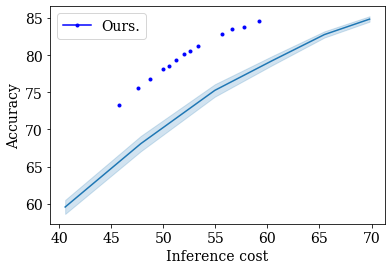

In [122]:
font = {'family' : 'serif',
        'size'   : 14}

combined_dicts = ours_cifar100_dict+boosted_cifar100_dict
matplotlib.rc('font', **font)

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_acc = dict_of_result['gated_acc']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_acc, marker, color=dict_of_result['color'])
sns.lineplot(data=aggregate_df, x="average_IC", y="ACC")
    # fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference cost')
ax.set_ylabel('Accuracy')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('cifar100_perf_vs_cost.pdf')

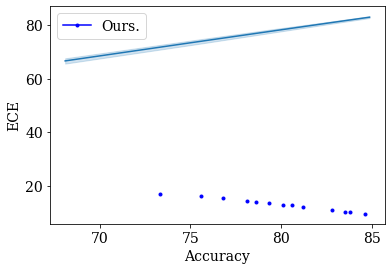

In [123]:
matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
sns.lineplot(data=aggregate_df_acc, x="average_ACC", y="ECE")
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Accuracy')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_ece_cifar100.pdf')

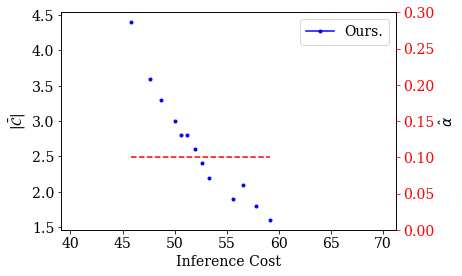

In [130]:
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
min_x = np.inf
max_x = -np.inf
ax2=ax.twinx()
sns.lineplot(data=aggregate_df, x="average_IC", y="gated_average_inef")
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_inef, marker, color=dict_of_result['color'])
   # ax2.plot(cost, alpha, '^', color=dict_of_result['color'], alpha=0.5)
    min_x = np.min(cost) if min_x> np.min(cost) else  min_x
    max_x = np.max(cost) if max_x< np.max(cost) else  max_x
# fig.xlabel('- inference cost')

ax2.set_ylim([0, 0.3])
ax2.hlines(0.1, min_x, max_x, color='r', linestyles='dashed')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
ax.set_xlabel('Inference Cost')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
#ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('inef_cost_cifar100.pdf')

<AxesSubplot:xlabel='average_IC', ylabel='gated_average_inef'>

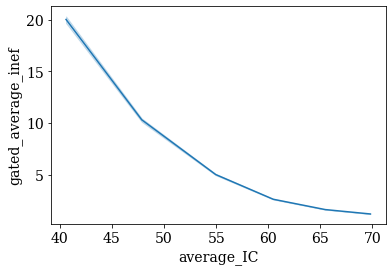

In [129]:
sns.lineplot(data=aggregate_df, x="average_IC", y="gated_average_inef")